In [25]:
using Revise
using PauliPropagation
using Plots

In [26]:
nq = 8
op = PauliString(nq, :Z, 4)

PauliString(nqubits: 8, 1.0 * IIIZIIII)

In [27]:
nl = 4
topo = bricklayertopology(nq; periodic=false)

circ = hardwareefficientcircuit(nq, nl; topology=topo)
nparams = countparameters(circ)
ngates = length(circ)

124

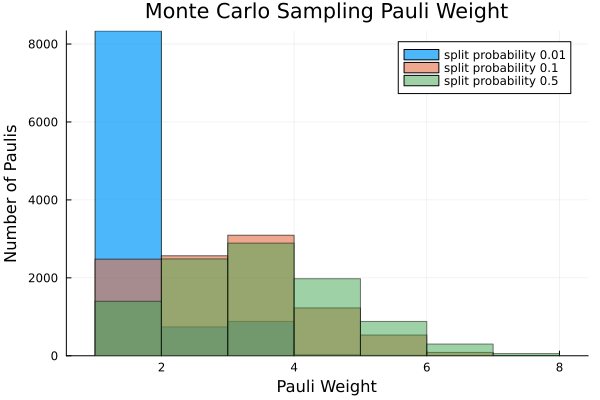

In [28]:
histogram(xlabel="Pauli Weight", ylabel="Number of Paulis", title="Monte Carlo Sampling Pauli Weight")
histogram!([countweight(montecarlopropagation(circ, op, rand(nparams), ones(ngates)*0.01)[1].operator) for _ in 1:10000], bins=1:nq, alpha=0.7, label = "split probability 0.01")
histogram!([countweight(montecarlopropagation(circ, op, rand(nparams), ones(ngates)*0.1)[1].operator) for _ in 1:10000], bins=1:nq, alpha=0.6, label = "split probability 0.1")
histogram!([countweight(montecarlopropagation(circ, op, rand(nparams), ones(ngates)*0.5)[1].operator) for _ in 1:10000], bins=1:nq, alpha=0.5, label = "split probability 0.5")

In [ ]:
Ws = 0:(nq-1)
errors = [estimateaverageerror(circ, op, 100000; max_weight=W) for W in Ws]
# where errors are zero, replace with small number to avoid log(0) error
errors[errors .== 0] .= 1e-10

In [ ]:
plot(Ws, errors, yscale=:identity, xlabel="Pauli Weight", ylabel="Error", title="Monte Carlo Sampling Error", label="", linewidth=2, marker=:circle)

In [ ]:
plot(Ws, errors, yscale=:log10, xlabel="Pauli Weight", ylabel="Error", title="Monte Carlo Sampling Error", ylim=(1e-5, 1e0), label="", linewidth=2, marker=:circle)

In [ ]:
montecarlopropagation(circ, op, rand(nparams), ones(ngates)*0.5)